# Sprint3課題 機械学習スクラッチ線形回帰


# 課題の目的

- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする
- スクラッチを通して線形回帰を理解する
- 基本的な機械学習のキーワードを学習する

# スクラッチによる実装

NumPyなど最低限のライブラリのみを使いアルゴリズムを実装する。

# 【問題1】線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込む。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- Pythonではクラスの外から呼び出すことがないメソッドにはアンダースコアを先頭にひとつつける慣例がある。

### 進め方の方向性

- ゴール（出力）を明確にする 
    - ゴール ： あるデータセットに対する平均二乗誤差が最小となる「パラメータの組み合わせ」を出力する**「クラス」**を作る。


- 平均二乗誤差（mean_squarerd_error）を最小化するパラメータセットを出力する関数を定義する。（平均二乗誤差が必要）


- 平均二乗誤差（mean_squarerd_error）を出力する関数を定義する。（仮の予測値が必要）


- 所与のパラメータ（初期値）に対して、データセットに対する（仮の）予測値を出力する関数（仮定関数）を定義する。


In [1]:
import sys

sys.path.append("/Users/makintosh/diveintocode-term1/ml-scratch")

from utils.ScratchLinearRegression import LinearRegression
from utils.split import train_test_split

## importした線形回帰クラスを利用して住宅価格を予測する

(data source)

 [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [2]:
# 演算処理
import numpy as np
import pandas as pd

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 機械学習
from sklearn.preprocessing import StandardScaler

In [3]:
# データの読み込み
df_original = pd.read_csv("train.csv")

In [4]:
# 線形回帰に用いるデータの列ラベルを取得
columns = ["GrLivArea", "YearBuilt", "SalePrice"]

In [5]:
# データの取得、欠損値の確認
df = df_original[columns]
df.isnull().any() #欠損値なし

GrLivArea    False
YearBuilt    False
SalePrice    False
dtype: bool

In [6]:
# 説明変数、　目的変数に分解する
df_X = df.drop("SalePrice", axis = 1)
df_y = df.drop(["GrLivArea", "YearBuilt"], axis = 1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


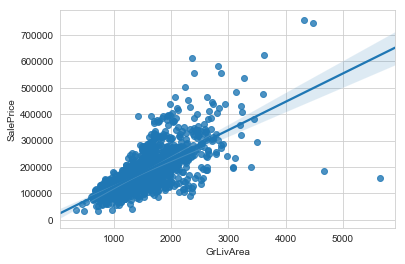

In [7]:
# データを可視化する
sns.set_style("whitegrid")
sns.regplot("GrLivArea", "SalePrice", data = df)

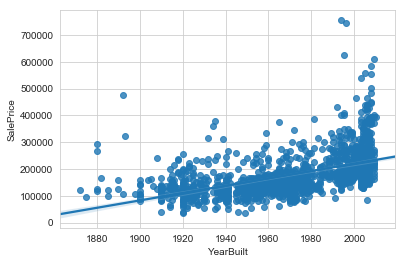

In [8]:
# データを可視化する
sns.set_style("whitegrid")
sns.regplot("YearBuilt", "SalePrice", data = df)

In [9]:
# Numpy配列に変換
X = df_X.values
y = df_y.values

In [10]:
# 説明変数を標準化する

ss = StandardScaler()
ss.fit(X)
X_std = ss.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# 目的変数を標準化する
ss = StandardScaler()
ss.fit(y)
y_std = ss.transform(y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# データを分割する
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std)

print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))

X_train:(1168, 2)
X_test:(292, 2)
y_train:(1168, 1)
y_test:(292, 1)


In [13]:
# インスタンス生成
LR = LinearRegression()

In [14]:
# fitting
LR.fit(X_train, y_train, X_test, y_test)

Validation data was completely set as arguments.


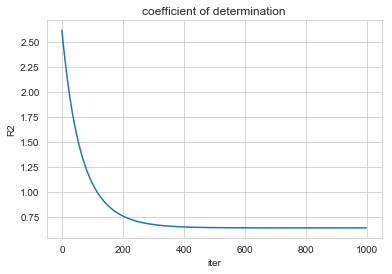

In [15]:
# 決定係数
coef_determination = LR.coef_determination

# 出力
plt.plot(coef_determination)
plt.xlabel("iter")
plt.ylabel("R2")
plt.title("coefficient of determination")
plt.show()

- 通常、決定係数は0〜１の範囲を取る。

- 学習が進み、決定係数が0〜１の範囲に収まることを確認した。

In [16]:
# 予測
y_pred = LR.predict(X_test)

# 残渣
residual_error = y_test - y_pred

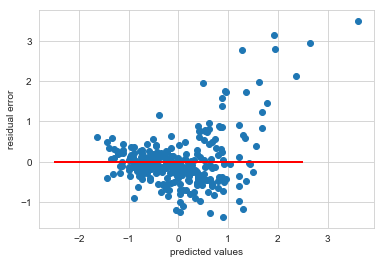

In [17]:
# 残差プロット
plt.scatter(y_pred, residual_error)
plt.xlabel("predicted values")
plt.ylabel("residual error")

plt.hlines(y = 0, xmin = -2.5, xmax = 2.5, lw = 2, color = 'red')

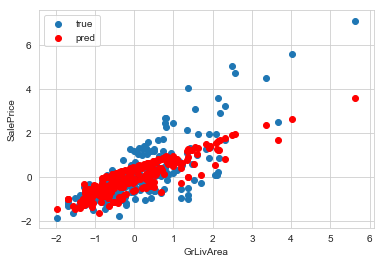

In [18]:
# 予測値と正解値をデータフレームに格納
df_results = pd.DataFrame(X_test, columns = df_X.columns)
df_results["y_true"] = y_test
df_results["y_pred"] = y_pred

# 可視化
plt.scatter(df_results["GrLivArea"], y_test, label = "true")
plt.scatter(df_results["GrLivArea"], y_pred, label = "pred", c = "r")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("")
plt.legend()
plt.show()

# 【問題2】学習曲線のプロット

まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [19]:
def show_learning_curve(loss, val_loss):
    
    import inspect
    import matplotlib.pyplot as plt
    
    # 引数名称を取得()
    arg_names = inspect.getfullargspec(show_learning_curve).args
    
    # 変数の定義
    y1 = loss # 学習用データによるMSE
    y2 = val_loss # 検証用データによるMSE
    
    # 出力
    plt.plot(loss, label = arg_names[0])
    plt.plot(val_loss, label = arg_names[1])
    plt.xlabel("Iter")
    plt.ylabel("MSE")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

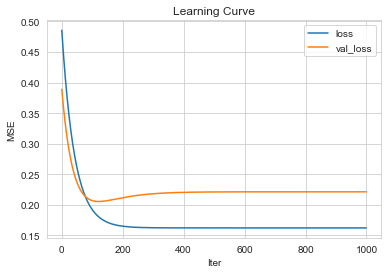

In [20]:
# lossを可視化
loss = LR.loss # 学習用データ
val_loss = LR.val_loss # 検証用データ

show_learning_curve(loss, val_loss)

- 学習用データ、検証用データの双方で、学習回数を重ねるごとにMSEが減少していることが確認された。

# 【問題3】（アドバンス課題）バイアス項の除去

- バイアス項（$θ$）を抜くと学習がどう変化するか検証する。

- 線形回帰モデルにおけるバイアス項の役割の考察・調査を行うこと。

### バイアス項を入れた場合（no_bias = False）の学習プロセス

In [21]:
# インスタンス生成
LR_no_bias_false = LinearRegression(no_bias = False)

In [22]:
# フィッティング
LR_no_bias_false.fit(X_train, y_train)

In [23]:
# 予測
y_pred_no_bias_false = LR_no_bias_false.predict(X_test)
y_pred_no_bias_false.shape

(292, 1)

In [24]:
# ロス
loss_no_bias_false = LR_no_bias_false.loss
loss_no_bias_false.shape

(1000,)

### バイアス項を入れない場合（no_bias = True）の学習プロセス

In [25]:
# インスタンス生成
LR_no_bias_true = LinearRegression(no_bias = True)

In [26]:
# フィッティング
LR_no_bias_true.fit(X_train, y_train)

In [27]:
# 予測
y_pred_no_bias_true = LR_no_bias_true.predict(X_test)

In [28]:
# ロス
loss_no_bias_true = LR_no_bias_true.loss

## 比較検証

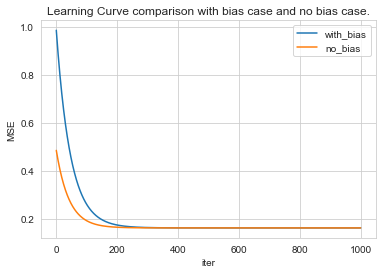

In [29]:
plt.plot(loss_no_bias_false, label = "with_bias")
plt.plot(loss_no_bias_true, label = "no_bias")
plt.xlabel("iter")
plt.ylabel("MSE")
plt.title("Learning Curve comparison with bias case and no bias case.")
plt.legend()
plt.show()

# 考察

- バイアス項を加味した結果、MSEの初期値は増加している。


- 一方、学習曲線のカーブの傾斜に注目すれば、バイアスを含めた方が傾斜が急であり、すなわち学習速度が相対的に早いことが確認された。


- 重要なのは、MSEの水準自体ではなく、予測精度の高いモデルを短時間で（つまり少ない学習回数で）作成することである。


- モデルの説明力の確認も必要ではあるが、バイアス項の導入は学習速度向上の観点で効果があると考える。

# 【問題4】（アドバンス課題）特徴量の多次元化

特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

- 特徴量に対して二乗等の加工を施す場合、尺度や単位を揃えておくべきと考える。

- したがって、標準化後のデータを用いることとする。

In [30]:
# 特徴量の二乗

X_squared = np.square(X_std)
X_squared

array([[0.13714686, 1.10458794],
       [0.23281775, 0.02456546],
       [0.26523794, 0.9697371 ],
       ...,
       [2.46379239, 1.00499084],
       [0.69353533, 0.49618728],
       [0.24397075, 0.04309546]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_squared, y_std)

In [32]:
# インスタンス生成
LR_squared = LinearRegression()

In [33]:
# 学習
LR_squared.fit(X_train, y_train)

In [34]:
# 予測
y_pred_with_squared_data = LR_squared.predict(X_test)

In [35]:
# ロス
loss_with_squared_data = LR_squared.loss

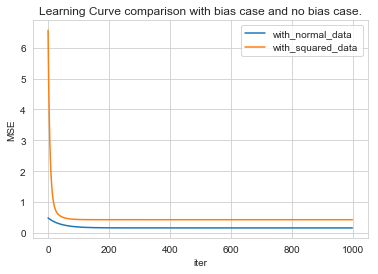

In [36]:
# 可視化
plt.plot(loss, label = "with_normal_data")
plt.plot(loss_with_squared_data, label = "with_squared_data")
plt.xlabel("iter")

plt.ylabel("MSE")
plt.title("Learning Curve comparison with bias case and no bias case.")
plt.legend()
plt.show()

# 考察

- バイアス項を加味した結果、MSEの初期値は増加している。


- 学習曲線のカーブの傾斜に注目すれば、バイアスを含めた場合よりも早く学習が行われていることが確認された。


- 絶対値が１以上の特徴量は二乗されることで絶対値が増加する。この結果、MSEの勾配が急になり、学習速度が向上している。


- モデルの説明力の確認も必要ではあるが、特徴量の次数を上げることは学習速度向上の観点で効果があると考える。

# 【問題5】（アドバンス課題）更新式の導出

最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$
θ_j := θ_j - α\frac{1}{m}Σ[h_θ(x^i - y^i)x^{i}_{j}]^2
$

### 最急降下法の更新式に関する説明

1. 線形回帰は、パラメータ$θ$（変数）と説明変数x（定数）の関数として表される"平均二乗誤差"(MSE：mean_squared_error)を最小化するパラメータ（$θ^*$）を求める問題。

 $
 J(θ) = \frac{1}{2m}Σ(h_θ(x^i) - y^i)^2 
 $


2. 変数$θ_j$(j = 1 ~ m)の変化に対するMSEの変化量$ΔMSE$は、勾配の傾き（＝偏微分係数$\frac{∂}{∂θ_j}$）が大きい$θ_j$ほど大きい。つまり、より少ない$θ_j$の変更回数でMSEを小さくする（＝効率的に学習させる）ためには、勾配の傾きが急な$θ_j$ほど大きく変化させれば良く、$θ_j$の変化量を$\frac{∂}{∂θ_j}$とすれば良い。


3. ここで、MSEの偏微分係数は以下で表される。

　$\frac{∂}{∂θ_j} J(θ) = \frac{1}{m}Σ(h_θ(x^i) - y^i)*\frac{∂}{∂θ_j}(h_θ(x^i) - y^i)$
 
 
4. $\frac{∂}{∂θ_j}(h_θ(x^i) - y^i) = x_j^i$ であることから、$\frac{∂}{∂θ_j} J(θ)= \frac{1}{m}Σ(h_θ(x^i) - y^i)*x_j^i$が導かれる。


5. あとは、$θ_j$の変化量$\frac{∂}{∂θ_j}$を学習率$α$を乗じて調整すれば良く、$
θ_j := θ_j - α\frac{1}{m}Σ[h_θ(x^i - y^i)x^{i}_{j}]^2$が求まる。

# 【問題6】（アドバンス課題）局所最適解の問題


最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

### 局所最適解の問題

1. $θ_j$以外の全ての$θ$を固定した場合、MSE$J(θ) = \frac{1}{2m}Σ(h_θ(x^i) - y^i)^2$は、$θ_j$に関して"下に凸"な放物線となる。


2. つまり、$θ_j$は$θ_j$の定義域全体でMSEを最小にする値が一意に定まり、これは局所最適解でもある。


3. 上記2は全ての$θ$に当てはまるため、MSEを最小化する$θ$の組み合わせを１つだけ持つことになる。

# 【問題7】スクラッチで学べることは何か

- ゼロから実装することで、既存のライブラリやモジュールの裏側にあるロジックの理解が深まる。


- クラス、メソッドを自ら実装することで、ソースコードの読解力が向上し、エラー発生原因、デバッグに対する理解が深まる。


- 行列演算に対する理解が深まる。（特に、行列のshapeの整合性が取れずにエラーが頻発した）

# 本課題からの学び

1. 行列演算・コーディングについて
    
    - 行列演算でエラーが多発し、デバッグに時間を費やしてしまった。行列計算はshapeが重要。
    
    - 目的変数のshapeをnp.newaxis、もしくはreshape(-1,1)で整えることが重要。
    
    - (2,)のように形状が不定となっていないことを都度確認し、reshape、あるいは軸を追加(np.newaxis)する。これらを自動化する方法があるのか調べてみたい。
    
    - クラスの中に変数のshapeを出力するprint()関数を入れておくことで、エラー発生箇所を特定しやすくなりデバッグのスピードが上がるし精神的にも楽。print()関数をこまめに入れる。
    
    - 最急降下法におけるパラメータの定義の理解を誤り、サンプル数ではなく特徴量の数としてしまった。結果、fittingする際に予測値が発散してしまった。Σで動かす変数の意味をどちらの方向に動かしている方向（行方向？列方向？）を確認して、メモする。
    
    - if文の中の論理演算子を"X_val != None"とした際にエラーが発生してしまい、"X_val is not None"で動作した。Noneを用いる場合を含め、論理演算子を学び直す。


2. 線形回帰について

    - バイアス項の導入や特徴量の次数を上げることが学習効率の向上につながると理解した。
    
    - 今後も学習を進めながら、「学習効率を高めるために何ができるのか？」を考え続けたい。


3. 原理原則と向き合う ： 「分かっているつもり」なことが次々に見つかる。都度調べて実装することで理解が深まる。